In [86]:
#First we need to upload the neccessary libraries. 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

### LOAD DATA ###
We can load our csv data using pandas's read_csv.

In [87]:
#I have the file in my same directory so I can just write the file name
filepath = "post-operative.data.txt" 

#This is what each column is
features = ['L-CORE', 'L-SURF', 'L-O2','L-BP','SURF-STBL','CORE-STBL','BP-STBL','COMFORT','decision ADM-DECS'] 

#In this csv file they use commasto separate each column
sep = ',' 

#In this csv file, when a values is missing they use an interrogation mark
na_values = '?' 

#Now we use the reac_csv function from pandas to read our data into a pandas Dataframe.
data = pd.read_csv(filepath, names=features, sep=sep, na_values=na_values) 

### CLEANING: MISSING VALUES ###

Since only 3 samples out of 90 (3%) have missing values I think it is best to just remove those three samples.
If a more significant number of sample was missing values I would use other strategies such as substituting
missing values with the mean, median or normal clinical values. 

In [88]:
cleaned_data = data.dropna()

### CLEANING: MISSING VALUES (CONTINUED)###

Just for practice, this is what I would do for the other ways of dealing with missing values:

In [89]:
#Substitute with mean
mean_substitution = data.fillna(data.mean())

#Substitute with median
median_substitution = data.fillna(data.median())

#Substitute with normal clinical values (I guess 20 would be a normal clinical value for comfort?)
clinical_substitution = data.fillna(20)

### PLOTTING: L-CORE VS COMFORT ##

The L-CORE data is categorical ordinal data. Low, mid and high are categories but low goes before mid and mid goes before high.
I tried plotting the data with a simple scatter plot but that did not give me any information. In this case, I think
it would be more insightfull to have three box-and-whisker plots for the low, mid and high categories. For that I had to split my comfort data into low, mid and high categories. Unfortunatly, there is not much infromation that can be obtained from this data. One thing we can say is that the HIGH temperature comfort samples have more spread in comparison to LOW and MID temperatures since these two categories have an IQR of 0. Another piece of information this plot gives us is that all of the values for COMFORT range in between 5 and 15.

Text(0,0.5,'COMFORT')

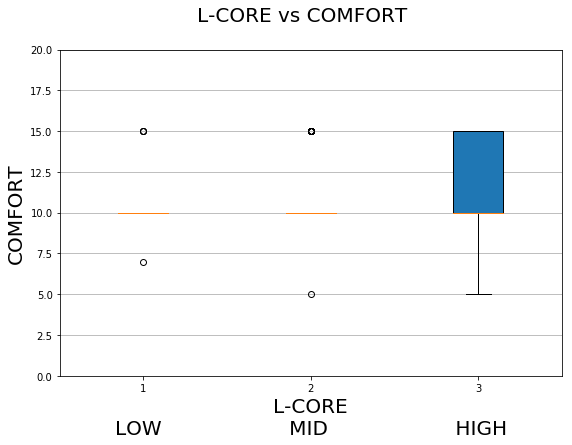

In [90]:
LOW_lcore = np.array([])
MID_lcore = np.array([])
HIGH_lcore = np.array([])

for x in range(cleaned_data.shape[0]):
    if cleaned_data.iloc[x,0] == 'low':
        LOW_lcore = np.append(LOW_lcore, cleaned_data.iloc[x,7])
    if cleaned_data.iloc[x,0] == 'mid':
        MID_lcore = np.append(MID_lcore, cleaned_data.iloc[x,7])
    if cleaned_data.iloc[x,0] == 'high':
        HIGH_lcore = np.append(HIGH_lcore, cleaned_data.iloc[x,7])
        
    
## combine these different collections into a list    
data_to_plot_lcore = [LOW_lcore, MID_lcore, HIGH_lcore]
# Create a figure instance
fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(data_to_plot_lcore,patch_artist=True)
ax.yaxis.grid(True)
ax.set_ybound([0,20])
fig.suptitle('L-CORE vs COMFORT', fontsize=20)
ax.set_xlabel('L-CORE\nLOW                    MID                    HIGH', fontsize=20)
ax.set_ylabel('COMFORT', fontsize=20)



### PLOTTING: L-SURF VS COMFORT ##

The L-SURF data is very similar to the L-CORE data. It is categorical ordinal data. For this reason I plot it in the same manner as the L-CORE data. This plot looks similar to the L-CORE vs COMFORT plot, which make me think that that the two features are too similar and I might need to eliminate one of the two in a preprocessing step for machine learning. From a scientific standpoint it makes sense that surface temperature and internal temperature are linearly dependent. 

Text(0,0.5,'COMFORT')

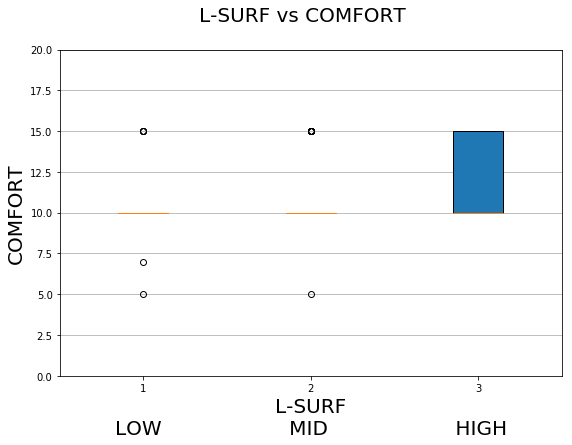

In [91]:
LOW_lsurf = np.array([])
MID_lsurf = np.array([])
HIGH_lsurf = np.array([])

for x in range(cleaned_data.shape[0]):
    if cleaned_data.iloc[x,1] == 'low':
        LOW_lsurf = np.append(LOW_lsurf, cleaned_data.iloc[x,7])
    if cleaned_data.iloc[x,1] == 'mid':
        MID_lsurf = np.append(MID_lsurf, cleaned_data.iloc[x,7])
    if cleaned_data.iloc[x,1] == 'high':
        HIGH_lsurf = np.append(HIGH_lsurf, cleaned_data.iloc[x,7])
        
    
## combine these different collections into a list    
data_to_plot_lsurf = [LOW_lsurf, MID_lsurf, HIGH_lsurf]
# Create a figure instance
fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(data_to_plot_lsurf,patch_artist=True)
ax.yaxis.grid(True)
ax.set_ybound([0,20])
fig.suptitle('L-SURF vs COMFORT', fontsize=20)
ax.set_xlabel('L-SURF\nLOW                    MID                    HIGH', fontsize=20)
ax.set_ylabel('COMFORT', fontsize=20)

### PLOTTING: L-O2 VS COMFORT ##

The L-O2 data is still ordinal categorical data. Instead of 3, now we have 4 possible values: poor, fair, good and excellent. Poor goes before fair, which goes before good, which goes before excellent. By exploring this data, I realized that none of the samples have an L-O2 value of poor or fair; only good or excellent. For that reason, it does not make sense to have a boxplot for poor or fair values. By looking at IQR, the samples with "good" O2 levels seems to have more spread out comfort levels than those with excellent L-O2.

Text(0,0.5,'COMFORT')

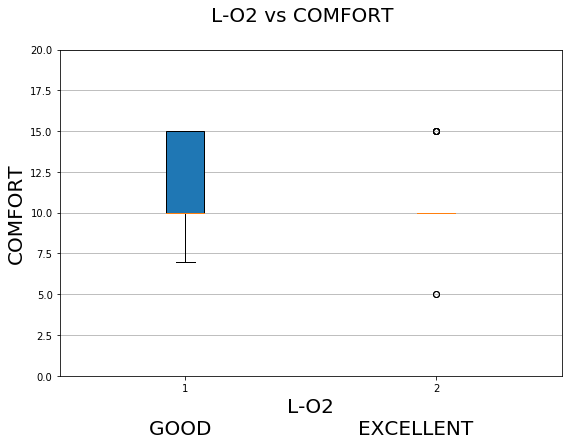

In [92]:
GOOD_lo2 = np.array([])
EXCELLENT_lo2 = np.array([])

for x in range(cleaned_data.shape[0]):
    if cleaned_data.iloc[x,2] == 'good':
        GOOD_lo2 = np.append(GOOD_lo2, cleaned_data.iloc[x,7])
    if cleaned_data.iloc[x,2] == 'excellent':
        EXCELLENT_lo2 = np.append(EXCELLENT_lo2, cleaned_data.iloc[x,7])
    
## combine these different collections into a list    
data_to_plot_lo2 = [GOOD_lo2, EXCELLENT_lo2]
# Create a figure instance
fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(data_to_plot_lo2,patch_artist=True)
ax.yaxis.grid(True)
ax.set_ybound([0,20])
fig.suptitle('L-O2 vs COMFORT', fontsize=20)
ax.set_xlabel('L-O2\nGOOD                       EXCELLENT', fontsize=20)
ax.set_ylabel('COMFORT', fontsize=20)

### PLOTTING: L-BP VS COMFORT ##

The L-BP data is similar in nature to the L-CORE or L-SURF data. It is also ordinal categorical data and we can plot it in the same way as we did with L-CORE or L-SURF. I cannot infer anything about the relationship between L-BP and COMFORT from this plot.

Text(0,0.5,'COMFORT')

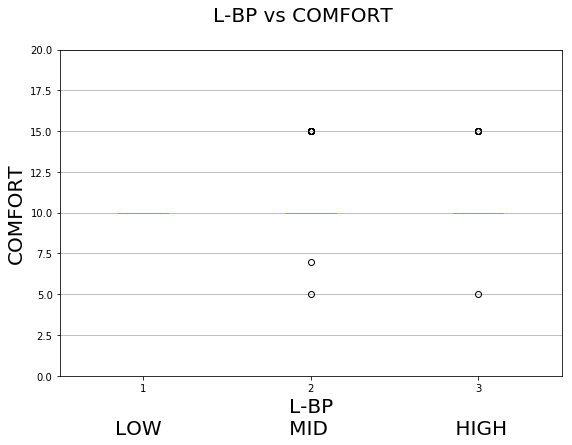

In [93]:
LOW_lbp = np.array([])
MID_lbp = np.array([])
HIGH_lbp = np.array([])

for x in range(cleaned_data.shape[0]):
    if cleaned_data.iloc[x,3] == 'low':
        LOW_lbp = np.append(LOW_lbp, cleaned_data.iloc[x,7])
    if cleaned_data.iloc[x,3] == 'mid':
        MID_lbp = np.append(MID_lbp, cleaned_data.iloc[x,7])
    if cleaned_data.iloc[x,3] == 'high':
        HIGH_lbp = np.append(HIGH_lbp, cleaned_data.iloc[x,7])
        
    
## combine these different collections into a list    
data_to_plot_lbp = [LOW_lbp, MID_lbp, HIGH_lbp]
# Create a figure instance
fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(data_to_plot_lbp,patch_artist=True)
ax.yaxis.grid(True)
ax.set_ybound([0,20])
fig.suptitle('L-BP vs COMFORT', fontsize=20)
ax.set_xlabel('L-BP\nLOW                    MID                    HIGH', fontsize=20)
ax.set_ylabel('COMFORT', fontsize=20)

### PLOTTING: SURF-STBL VS COMFORT ##

SURF-STBL is ordinal categorical data. Unstable goes before mod-stable, which goes before stable. None of our samples reported a value of "mod-stable" for SURF-STBL and for that reason I am only plotting the stable and unstable samples. The comfort levels for patients with unstable surface temperature show a higher degree of spread than those with stable surface temperatures.

Text(0,0.5,'COMFORT')

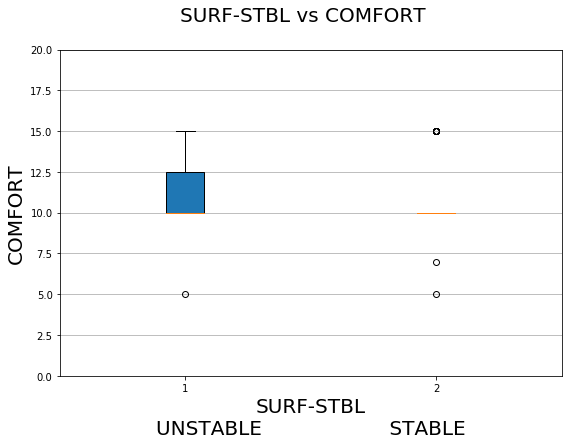

In [94]:
UNSTABLE_surfstbl = np.array([])
STABLE_surfstbl = np.array([])

for x in range(cleaned_data.shape[0]):
    if cleaned_data.iloc[x,4] == 'unstable':
        UNSTABLE_surfstbl = np.append(UNSTABLE_surfstbl, cleaned_data.iloc[x,7])
    if cleaned_data.iloc[x,4] == 'stable':
        STABLE_surfstbl = np.append(STABLE_surfstbl, cleaned_data.iloc[x,7])
        
    
## combine these different collections into a list    
data_to_plot_surfstbl = [UNSTABLE_surfstbl, STABLE_surfstbl]

# Create a figure instance
fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(data_to_plot_surfstbl,patch_artist=True)
ax.yaxis.grid(True)
ax.set_ybound([0,20])
fig.suptitle('SURF-STBL vs COMFORT', fontsize=20)
ax.set_xlabel('SURF-STBL\nUNSTABLE                    STABLE', fontsize=20)
ax.set_ylabel('COMFORT', fontsize=20)

### PLOTTING: CORE-STBL VS COMFORT ##

CORE-STBL is very similar data to SURF-STBL. I plot it the same way. Unlike SURF-STBL, this time we have values of all three types: unstable, mod-stable and stable. The similarity between the nature of core temperature and surface temperature make me thinf that this might be repeated features and I might need to check for that in preprocessing steps. Just like with SURF-STBL, our unstable samples have a set of more spread out comfort levels. 

Text(0,0.5,'COMFORT')

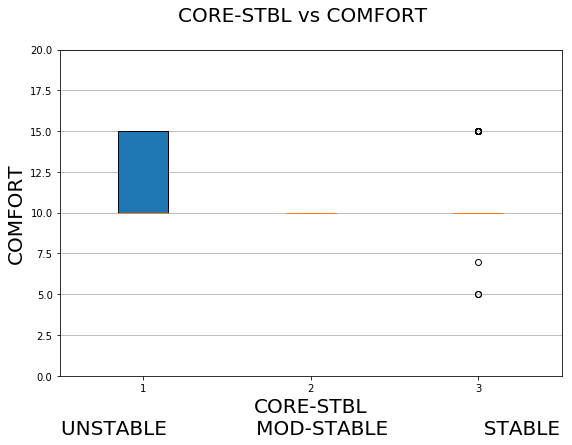

In [95]:
UNSTABLE_corestbl = np.array([])
MOD_STABLE_corestbl = np.array([])
STABLE_corestbl = np.array([])

for x in range(cleaned_data.shape[0]):
    if cleaned_data.iloc[x,5] == 'unstable':
        UNSTABLE_corestbl = np.append(UNSTABLE_corestbl, cleaned_data.iloc[x,7])
    if cleaned_data.iloc[x,5] == 'mod-stable':
        MOD_STABLE_corestbl = np.append(MOD_STABLE_corestbl, cleaned_data.iloc[x,7])    
    if cleaned_data.iloc[x,5] == 'stable':
        STABLE_corestbl = np.append(STABLE_corestbl, cleaned_data.iloc[x,7])
        
    
## combine these different collections into a list    
data_to_plot_corestbl = [UNSTABLE_corestbl, MOD_STABLE_corestbl,STABLE_corestbl]

# Create a figure instance
fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(data_to_plot_corestbl,patch_artist=True)
ax.yaxis.grid(True)
ax.set_ybound([0,20])
fig.suptitle('CORE-STBL vs COMFORT', fontsize=20)
ax.set_xlabel('CORE-STBL\nUNSTABLE              MOD-STABLE               STABLE', fontsize=20)
ax.set_ylabel('COMFORT', fontsize=20)

### PLOTTING: BP-STBL VS COMFORT ##
BP-STBL data is ordinal categorical data. My plot shows some outliers in the set of samples with stable values and a lot of spread on the samples with unstable values based on the IQR. 


Text(0,0.5,'COMFORT')

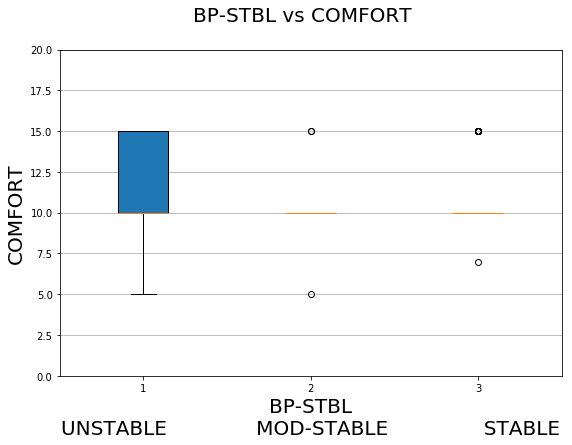

In [64]:
UNSTABLE_bpstbl = np.array([])
MOD_STABLE_bpstbl = np.array([])
STABLE_bpstbl = np.array([])

for x in range(cleaned_data.shape[0]):
    if cleaned_data.iloc[x,6] == 'unstable':
        UNSTABLE_bpstbl = np.append(UNSTABLE_bpstbl, cleaned_data.iloc[x,7])
    if cleaned_data.iloc[x,6] == 'mod-stable':
        MOD_STABLE_bpstbl = np.append(MOD_STABLE_bpstbl, cleaned_data.iloc[x,7])    
    if cleaned_data.iloc[x,6] == 'stable':
        STABLE_bpstbl = np.append(STABLE_bpstbl, cleaned_data.iloc[x,7])
        
    
## combine these different collections into a list    
data_to_plot_bpstbl = [UNSTABLE_bpstbl, MOD_STABLE_bpstbl,STABLE_bpstbl]

# Create a figure instance
fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(data_to_plot_bpstbl,patch_artist=True)
ax.yaxis.grid(True)
ax.set_ybound([0,20])
fig.suptitle('BP-STBL vs COMFORT', fontsize=20)
ax.set_xlabel('BP-STBL\nUNSTABLE              MOD-STABLE               STABLE', fontsize=20)
ax.set_ylabel('COMFORT', fontsize=20)

### PLOTTING:  decision ADM-DECS VS COMFORT ##
Our last attibute is the "decision ADM-DECS" (discharge decision). There are three possible outcomes: I (patient sent to Intensive Care Unit), S (patient prepared to go home) or A (patient sent to general hospital floor). This data is definetly categorical. One could argue that it is ordinal because going home is better than going to the general hospital floor which is better than going to the ICU, however one could also treat this as nominal features depending on the context. 

The plot shows that there was no spread in comfort levels with patients going to the ICU, there was quite a bit of spread and some outliers with patients that were prepared to go home and there were two outliers with patients that were sent to the general hospital floor. 

Text(0,0.5,'COMFORT')

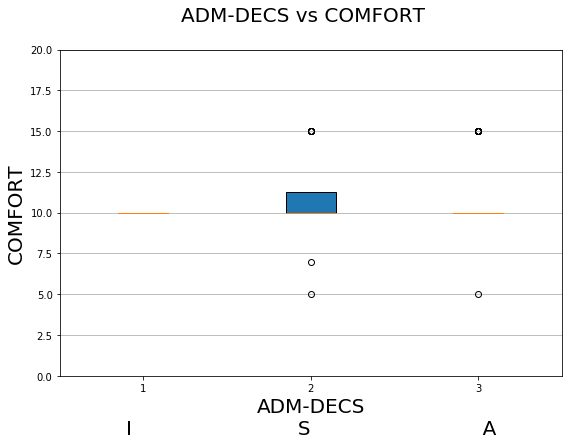

In [65]:
I = np.array([])
S = np.array([])
A = np.array([])

for x in range(cleaned_data.shape[0]):
    if cleaned_data.iloc[x,8] == 'I':
        I = np.append(I, cleaned_data.iloc[x,7])
    if cleaned_data.iloc[x,8] == 'S':
        S = np.append(S, cleaned_data.iloc[x,7])    
    if cleaned_data.iloc[x,8] == 'A':
        A = np.append(A, cleaned_data.iloc[x,7])
        
    
## combine these different collections into a list    
data_to_plot_admdecs = [I, S, A]

# Create a figure instance
fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(data_to_plot_admdecs,patch_artist=True)
ax.yaxis.grid(True)
ax.set_ybound([0,20])
fig.suptitle('ADM-DECS vs COMFORT', fontsize=20)
ax.set_xlabel('ADM-DECS\nI                          S                           A', fontsize=20)
ax.set_ylabel('COMFORT', fontsize=20)

### PREPROCESSING ###
If I was to use this data for a machine learning algorithm, I would need to do some preprocessing on it. I have already done some cleaning by removing samples with NaN values at the beginning of this notebook. I am going to treat the comfort data as a continuous feature with a precision of 1, I am going to treat the ADM-DECS data as nominal categorical features and I am treating all the other features as ordinal categorical ones. I could treat the ADM-DECS data as ordinal but then I wouldn't get to do one hot encoding which would be a pity since the point of homework is learning new things.


### PREPROCESSING: ORDINAL CATEGORICAL DATA ###
I believe that most machine learning algorithms need to receive the values of each feature as a number. A lot of our data can be substituted with a simple ordinal map. All the features that have low, mid or high options can be substituted with 1, 2 and 3, respectively. The features that have stable, mod-stable and unstable options can be substituted with 3, 2 and 1, respectively. The L-O2 feature has excellent, good, fair and poor options; which can be substituted for 4,3,2 and 1 respectively. 

In [66]:
ordinal_map = {"L-CORE":    {"high": 3, "mid": 2, "low": 1},
               "L-SURF":    {"high": 3, "mid": 2, "low": 1},
               "L-BP":      {"high": 3, "mid": 2, "low": 1},
               "L-O2":      {"excellent": 4, "good": 3, "fair": 2, "poor": 1},
               "SURF-STBL": {"stable": 3, "mod-stable": 2, "unstable": 1},
               "CORE-STBL": {"stable": 3, "mod-stable": 2, "unstable": 1},
               "BP-STBL":   {"stable": 3, "mod-stable": 2, "unstable": 1}}

#This gives a warning because it thinks that I don't really want to do this when I actually do:
cleaned_data.replace(ordinal_map, inplace=True) 


C:\Users\Iago Patino Lopez\Anaconda3\lib\site-packages\pandas\core\generic.py:5817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  regex=regex)


### PREPROCESSING: NOMINAL CATEGORICAL DATA ###

At this point our ordinal categorical data has been mapped to numbers. Now I will do one-hot encoding with the decision ADM-DECS data. This is a neccessary step if we don't want our machine learning algorithm to think that value I is better than value A, etc, in out ADM-DECS feature. Whether this step is neccessary instead of using a simple encoding map depends on the context.

In [67]:
cleaned_data = pd.get_dummies(cleaned_data, columns=["decision ADM-DECS"])

### PREPROCESSING: NORMALIZATION ###
If our machine learning algorithm for which we are preprocessing this data is sensitive to magnitude, then we should normalize our COMFORT measurements. I am not sure on wether I should also normalize my categorical data. 

In [71]:
comfort_values = cleaned_data[['COMFORT']].values.astype(float)
processor = preprocessing.MinMaxScaler()
normalized_comfort = processor.fit_transform(comfort_values)
cleaned_data['COMFORT'] = normalized_comfort

### PREPROCESSING/FEATURE ENGINEERING: REDUNDANT FEATURES ###

Finally, I suspected that my surface temperature values are going to be very highly correlated to my core temperature values. I also suspect that my surface stability values are going to be very highly correlated to my core stability values. If this pairs of atibutes are indeed redundant we would be wasting computing power and should be eliminated.

I was not sure of how to measure the correlation between my pairs of attributes. I learnt that Pearson was not a good choice because my data is not continuous but ordinal categorical. This lead me to the Spearman test. Spearman works well with ordinal categorical data but it assumes a monotonic relationship which is not obvious by looking at a plot of the data. Finally I decided on the Kendall test because the only assumption it has is that the data has an ordinal or continous scale. 

The Kendall test gave a correlation of 0.17 for L-CORE vs L-SURF and 0.18 for SURF-STBL vs CORE-STBL. I run the other two tests out of curiosity and also obtained similar results. My only concern here is that our sample population is relatively small, we only have 90 samples. For that reason, I think it would be safest to not eliminate any of the atributes and just assume a higher computational cost. 

By the way, no combination of atributes showed a moderate or high correlation except decision ADM-DEC_S vs decision ADM-DEC_I. This correlation is more than expected since being sent home must be inversely correlated with staying at the hospital. I was not sure on wether I should eliminate one of the two.

In [82]:
cleaned_data.corr(method='kendall')

,L-CORE,L-SURF,L-O2,L-BP,SURF-STBL,CORE-STBL,BP-STBL,COMFORT,decision ADM-DECS_A,decision ADM-DECS_A,decision ADM-DECS_I,decision ADM-DECS_S
L-CORE,1.000000,0.172400,0.107036,0.039525,-0.034574,-0.180985,-0.205772,0.087985,0.049778,0.014743,0.014743,-0.058014
L-SURF,0.172400,1.000000,-0.066784,-0.144835,-0.222742,0.034145,-0.013059,0.146510,0.127710,-0.142775,-0.142775,-0.062697
L-O2,0.107036,-0.066784,1.000000,0.094996,0.104288,-0.018705,-0.008585,-0.223179,0.063024,-0.101804,-0.101804,-0.015989
L-BP,0.039525,-0.144835,0.094996,1.000000,0.067901,-0.021157,-0.060688,0.012149,0.036493,0.149131,-0.063191,-0.057871
SURF-STBL,-0.034574,-0.222742,0.104288,0.067901,1.000000,0.182604,0.039999,-0.099497,-0.042719,0.106600,0.106600,-0.007095
CORE-STBL,-0.180985,0.034145,-0.018705,-0.021157,0.182604,1.000000,-0.013086,-0.086545,0.222108,-0.399047,0.029199,-0.139272
BP-STBL,-0.205772,-0.013059,-0.008585,-0.060688,0.039999,-0.013086,1.000000,0.031132,-0.059290,-0.053603,-0.147409,0.108663
COMFORT,0.087985,0.146510,-0.223179,0.012149,-0.099497,-0.086545,0.031132,1.000000,-0.024077,0.190026,-0.044712,-0.009997
decision ADM-DECS_A,0.049778,0.127710,0.063024,0.036493,-0.042719,0.222108,-0.059290,-0.024077,1.000000,-0.165169,-0.165169,-0.945396
decision ADM-DECS_A,0.014743,-0.142775,-0.101804,0.149131,0.106600,-0.399047,-0.053603,0.190026,-0.165169,1.000000,-0.011628,-0.066556


### FINAL RESULT ###

This is how our Dataframe looks after preprocessing, I hope I didnt miss any preprocessing steps. 

In [83]:
cleaned_data.head()

,L-CORE,L-SURF,L-O2,L-BP,SURF-STBL,CORE-STBL,BP-STBL,COMFORT,decision ADM-DECS_A,decision ADM-DECS_A,decision ADM-DECS_I,decision ADM-DECS_S
0,2,1,4,2,3,3,3,1.0,1,0,0,0
1,2,3,4,3,3,3,3,0.5,0,0,0,1
2,3,1,4,3,3,3,2,0.5,1,0,0,0
3,2,1,3,3,3,1,2,1.0,0,1,0,0
4,2,2,4,3,3,3,3,0.5,1,0,0,0
